# Cagayan Data Mining Notebook

<div style="text-align:center">
    <img src='https://riverbasin.denr.gov.ph/img/CDO%20RB/CDORB1.jpg' width='500px'/>
</div>

This notebook processes the cleaned data from the data cleaning notebook. Processes of this notebook includes the following:
1. Removes hour and minute from the timestamp.
2. Clean duplicated data by keeping the first duplicated variable.
3. Ammend missing Water Level Data by Interpolation.
4. File integrity checker

### Authors
- Gifrey John M. Sulay

### Checked by:
- Dr. Anabel A. Abuzo
- Engr. Augustine Ave Padagunan

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pathlib import Path
import os
from IPython.display import display

__author__ = "Gifrey John M. Sulay"
__copyright__ = "Xavier University - Engineering Resource Center"

In [2]:
import datetime
from dateutil.relativedelta import relativedelta

def set_time_range():
    run = True
    while run:
        try:
            input_start_date = str(input("Please input Start Date (Format=Month,Date,Year): "))
            start_date_datetime = pd.to_datetime(input_start_date,format="%m,%d,%Y")

            input_end_date = str(input("Please input End Date (Format=Month,Date,Year): "))
            end_date_datetime = pd.to_datetime(input_end_date,format="%m,%d,%Y")

            print((f"Date start is {start_date_datetime} and End Date is {end_date_datetime + datetime.timedelta(days = 1)}"))
            date_confirm = input("Type y if the input is correct or n to try again: ")
            if date_confirm == "y":
                start_date = start_date_datetime
                end_date = end_date_datetime + datetime.timedelta(days = 1)
                run = False
            elif date_confirm == "n":
                continue
            else:
                raise ValueError
                
        except Exception as e:
            print(e)
    return start_date, end_date

is_range = input("Do you wish to select a range? (y for yes, n for no and select entire available data)")

run=True
while run:
    try:
        if is_range == "y" or "Y":
            start_date, end_date = set_time_range()
        elif is_range == "n" or "N":
            start_date, end_date = (None, None)
        else:
            print('Not valid argument. Please try again')
            raise ValueError
        run = False
    except Exception as e:
        print(e)
    

Date start is 2021-12-01 00:00:00 and End Date is 2022-01-01 00:00:00


In [3]:
cag_path = Path("Edited_Data/Cagayan/cag.csv")
rg_path = Path("Edited_Data/Cagayan/rg1.csv")

cag = pd.read_csv(cag_path)[['Timestamp', 'Sensor Value']]
rg = pd.read_csv(rg_path)[['Timestamp', 'Sensor Value']]

display('Cagayan Water Table',cag.head(),cag.tail())
display('Rain Gauge Data',rg.head(),rg.tail())

'Cagayan Water Table'

,Timestamp,Sensor Value
0,12/2/2019 12:29:20 AM,0.910916
1,12/2/2019 1:29:23 AM,0.910916
2,12/2/2019 2:30:19 AM,0.886947
3,12/2/2019 3:29:57 AM,0.910916
4,12/2/2019 4:29:26 AM,0.934885


,Timestamp,Sensor Value
16393,1/1/2022 10:28:42 AM,0.982823
16394,1/1/2022 11:31:29 AM,0.982823
16395,1/1/2022 12:29:57 PM,0.982823
16396,1/1/2022 1:28:35 PM,0.982823
16397,1/1/2022 2:34:39 PM,0.982823


'Rain Gauge Data'

,Timestamp,Sensor Value
0,12/31/2020 00:00:00,0.00000
1,12/31/2020 00:30:00,0.00000
2,12/31/2020 01:00:00,0.00000
3,12/31/2020 01:30:00,0.00000
4,12/31/2020 02:00:00,0.01515


,Timestamp,Sensor Value
17515,12/31/2021 21:30:00,0.12000
17516,12/31/2021 22:00:00,0.11000
17517,12/31/2021 22:30:00,0.07935
17518,12/31/2021 23:00:00,0.03998
17519,12/31/2021 23:30:00,0.02873


### Checking For Duplicates

In [4]:
#Delete duplicates
cag_1 = cag.drop_duplicates(keep='first')
rg_1 = rg.drop_duplicates(keep='first')

cag_dropped=len(cag)-len(cag_1)
rg_dropped=len(rg)-len(rg_1)

print(f"No of cells dropped from water level table is {cag_dropped} cells")
print(f"No of cells dropped from rain gauge table is {rg_dropped} cells")

cag = cag_1
rg = rg_1

display(cag,rg)

No of cells dropped from water level table is 1820 cells
No of cells dropped from rain gauge table is 0 cells


,Timestamp,Sensor Value
0,12/2/2019 12:29:20 AM,0.910916
1,12/2/2019 1:29:23 AM,0.910916
2,12/2/2019 2:30:19 AM,0.886947
3,12/2/2019 3:29:57 AM,0.910916
4,12/2/2019 4:29:26 AM,0.934885
...,...,...
15717,1/1/2022 10:28:42 AM,0.982823
15718,1/1/2022 11:31:29 AM,0.982823
15719,1/1/2022 12:29:57 PM,0.982823
15720,1/1/2022 1:28:35 PM,0.982823


,Timestamp,Sensor Value
0,12/31/2020 00:00:00,0.00000
1,12/31/2020 00:30:00,0.00000
2,12/31/2020 01:00:00,0.00000
3,12/31/2020 01:30:00,0.00000
4,12/31/2020 02:00:00,0.01515
...,...,...
17515,12/31/2021 21:30:00,0.12000
17516,12/31/2021 22:00:00,0.11000
17517,12/31/2021 22:30:00,0.07935
17518,12/31/2021 23:00:00,0.03998


### Time format

We have the timestamp data but it is ***unreadable*** for indexing as these are just text strings. Thus, we convert the string Timestamp data into a readable format for the pandas module used in this noetbook for data cleaning.

In [5]:
def column_apply(df,column, function):
    df[column] = df[column].apply(function)

def map_apply(df,function):
    df =  df.applymap(function)

In [6]:
import datetime

column_apply(cag,'Timestamp', lambda x: pd.to_datetime(x).replace(second = 0, minute=0))
column_apply(rg,'Timestamp', lambda x: pd.to_datetime(x).replace(second = 0, minute=0))

# column_apply(cag,'Timestamp', lambda x: x.replace(second = 0, minute=0))
# column_apply(rg,'Timestamp', lambda x: x.replace(second = 0, minute=0))

### Transforms the data into proper format

The data as it stands now is by ***30-minute increments***. We want the data to be transformed into an hourly format. Thus, we get the mean average of all the data points in an hourly timeframe.

In [7]:
rg = rg.groupby(by='Timestamp').mean().reset_index()
cag = cag.groupby(by='Timestamp').mean().reset_index()

Rename the the sensor value header into its correspendong value type (e.g. Water Level, Rain Gauge)

In [8]:
cag=cag.rename(columns={"Sensor Value":"Water Level"})
rg=rg.rename(columns={"Sensor Value":"Rain Gauge"})

display(cag,rg)

,Timestamp,Water Level
0,2019-12-02 00:00:00,0.910916
1,2019-12-02 01:00:00,0.910916
2,2019-12-02 02:00:00,0.886947
3,2019-12-02 03:00:00,0.910916
4,2019-12-02 04:00:00,0.934885
...,...,...
14560,2022-01-01 10:00:00,0.982823
14561,2022-01-01 11:00:00,0.982823
14562,2022-01-01 12:00:00,0.982823
14563,2022-01-01 13:00:00,0.982823


,Timestamp,Rain Gauge
0,2020-12-31 00:00:00,0.000000
1,2020-12-31 01:00:00,0.000000
2,2020-12-31 02:00:00,0.071375
3,2020-12-31 03:00:00,0.308200
4,2020-12-31 04:00:00,0.178800
...,...,...
8755,2021-12-31 19:00:00,0.001405
8756,2021-12-31 20:00:00,0.000000
8757,2021-12-31 21:00:00,0.060000
8758,2021-12-31 22:00:00,0.094675


### Checking for Missing Data

Create a new dataframe with correct timestamp progression and merge the water level dataframe and rain gauge dataframe to the correct timestamp progression as the base.

The correct timestamp progression will start at the earliest date from either the rain gauge and water level tables and will end at their latest.

In [9]:
def make_base_time(cag,rg):
    rg_start_date = rg.iloc[0,0]
    rg_end_date = rg.iloc[-1,0]
    cag_start_date = cag.iloc[0,0]
    cag_end_date = cag.iloc[-1,0]


    if rg_start_date > cag_start_date:
        start_date = cag_start_date
    else:
        start_date = rg_start_date

    if rg_end_date < cag_end_date:
        end_date = cag_end_date
    else:
        end_date = rg_end_date

    base_time = pd.DataFrame({'Timestamp':pd.date_range(start=start_date, end=end_date, freq="H")})
    return base_time

if start_date != None:
    base_time = pd.DataFrame({'Timestamp':pd.date_range(start=start_date, end=end_date, freq="H")})
else:
    base_time = make_base_time(cag,rg)

In [10]:
cag = pd.merge(base_time, cag, how='left', on='Timestamp')
main_df = pd.merge(cag,rg,how='left', on='Timestamp')

In [11]:
missing_water = main_df.loc[main_df['Water Level'].isna()]
missing_rg = main_df.loc[main_df['Rain Gauge'].isna()]

display(missing_water)
display(missing_rg)

,Timestamp,Water Level,Rain Gauge
66,2021-12-03 18:00:00,NaN,0.000000
67,2021-12-03 19:00:00,NaN,0.000000
68,2021-12-03 20:00:00,NaN,0.000000
69,2021-12-03 21:00:00,NaN,0.000000
70,2021-12-03 22:00:00,NaN,0.000000
...,...,...,...
387,2021-12-17 03:00:00,NaN,0.000000
388,2021-12-17 04:00:00,NaN,0.000000
389,2021-12-17 05:00:00,NaN,0.012935
390,2021-12-17 06:00:00,NaN,0.007480


,Timestamp,Water Level,Rain Gauge
744,2022-01-01,0.982823,NaN


### Hour and Rain Gauge Difference Data
Create a new column to input the hour the data was recorded.

We also create a new column for the Rain Gauge difference by subtracting the current value to its preceeding value and where all negative values are replaced with a 0.

In [12]:
main_df['Hour'] = main_df['Timestamp'].apply(lambda x: pd.to_datetime(x).strftime('%H'))

#Rearranges the datafrom to place the Hour data as the first column
main_df = main_df[['Hour']+main_df.columns.values[:-1].tolist()]

Interpolate the missing Rain Gauge Data

In [13]:
main_df['Rain Gauge'] = main_df['Rain Gauge'].astype('float64').interpolate()

In [14]:
def rg_diff(lst):
    new_list = [0]
    count = 1
    for value in lst[1:]:
        if value-lst[count-1] > 0:
            value-=lst[count-1]
            new_list.append(value)
        else:
            new_list.append(0)
        count += 1
    return new_list

main_df['RG_Diff'] = rg_diff(main_df.loc[:,'Rain Gauge'])

main_df

,Hour,Timestamp,Water Level,Rain Gauge,RG_Diff
0,00,2021-12-01 00:00:00,1.606017,0.000000,0.000000
1,01,2021-12-01 01:00:00,1.606017,0.000000,0.000000
2,02,2021-12-01 02:00:00,1.534110,0.000000,0.000000
3,03,2021-12-01 03:00:00,1.510141,0.000000,0.000000
4,04,2021-12-01 04:00:00,1.510141,0.000000,0.000000
...,...,...,...,...,...
740,20,2021-12-31 20:00:00,1.006792,0.000000,0.000000
741,21,2021-12-31 21:00:00,1.006792,0.060000,0.060000
742,22,2021-12-31 22:00:00,0.982823,0.094675,0.034675
743,23,2021-12-31 23:00:00,1.054730,0.034355,0.000000


### Check for Erroneous Water Level Data

As there may be instrumental errors from the sensors used, we check if there are any errors by removing the cell with a difference greater than 0.5 from its previous cell and interpolating it in place. 

In [15]:
def clean_water_level(df, column, diff_limit = 0.5):
    corrected_df = df.copy()
    water_level = corrected_df[column]
    #diff limit determines whether the difference is erroneous if difference is more than diff limit then data is erroneous
    is_erroneous=[0]
    count = 1
    
    for i in water_level[1:]:
        val = i-water_level[count - 1]
        val = abs(val)
        if val >= diff_limit:
            is_erroneous.append(1)
        else:
            is_erroneous.append(0)
        count += 1
    corrected_df['err_check']=is_erroneous
    corrected_df.loc[corrected_df['err_check']==1, column] = np.nan
    
    edited_water_level=corrected_df.loc[:, column]
    final_water_level=edited_water_level.astype('float64').interpolate()
    corrected_df=corrected_df.drop(columns=[column,'err_check'])
    corrected_df[column]=final_water_level
    return corrected_df

corrected_main_df = clean_water_level(main_df, 'Water Level', diff_limit=0.5)

In [16]:
display('Raw Water Table',main_df,'Corrected Water Table',corrected_main_df)

'Raw Water Table'

,Hour,Timestamp,Water Level,Rain Gauge,RG_Diff
0,00,2021-12-01 00:00:00,1.606017,0.000000,0.000000
1,01,2021-12-01 01:00:00,1.606017,0.000000,0.000000
2,02,2021-12-01 02:00:00,1.534110,0.000000,0.000000
3,03,2021-12-01 03:00:00,1.510141,0.000000,0.000000
4,04,2021-12-01 04:00:00,1.510141,0.000000,0.000000
...,...,...,...,...,...
740,20,2021-12-31 20:00:00,1.006792,0.000000,0.000000
741,21,2021-12-31 21:00:00,1.006792,0.060000,0.060000
742,22,2021-12-31 22:00:00,0.982823,0.094675,0.034675
743,23,2021-12-31 23:00:00,1.054730,0.034355,0.000000


'Corrected Water Table'

,Hour,Timestamp,Rain Gauge,RG_Diff,Water Level
0,00,2021-12-01 00:00:00,0.000000,0.000000,1.606017
1,01,2021-12-01 01:00:00,0.000000,0.000000,1.606017
2,02,2021-12-01 02:00:00,0.000000,0.000000,1.534110
3,03,2021-12-01 03:00:00,0.000000,0.000000,1.510141
4,04,2021-12-01 04:00:00,0.000000,0.000000,1.510141
...,...,...,...,...,...
740,20,2021-12-31 20:00:00,0.000000,0.000000,1.006792
741,21,2021-12-31 21:00:00,0.060000,0.060000,1.006792
742,22,2021-12-31 22:00:00,0.094675,0.034675,0.982823
743,23,2021-12-31 23:00:00,0.034355,0.000000,1.054730


### Plot the Water Table and Rain Gauge Data

We plot the water table against its corrected water level data from the previous cell and we plot the rain gauge data against its difference.

Shown below is the ***Water Level*** progression for the month

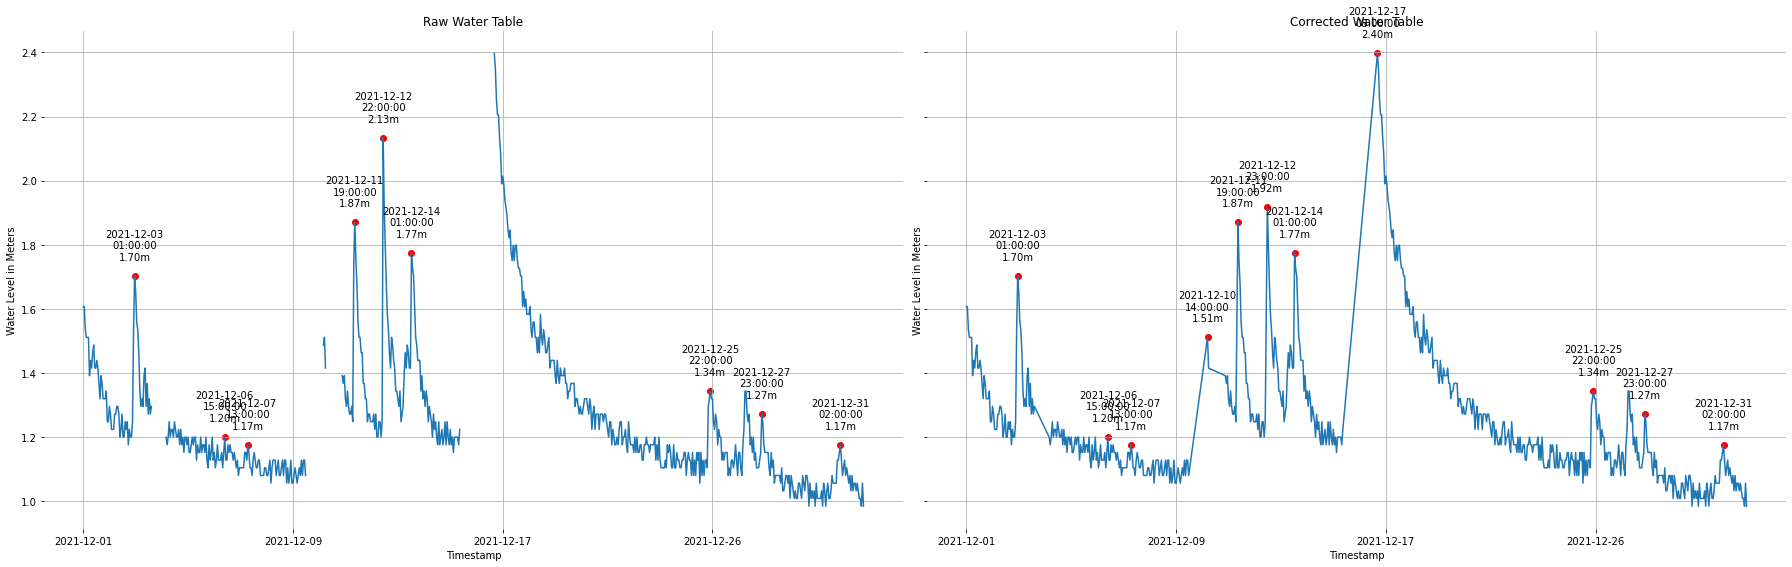

In [17]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

fig,ax = plt.subplots(1,2, figsize=(25,8), sharey=True)

water_level = main_df['Water Level'].to_numpy()
ax[0].plot(main_df['Timestamp'], water_level)
ax[0].set_title('Raw Water Table')
water_level_max_index = argrelextrema(water_level, np.greater , order = 10)
ax[0].scatter(main_df.loc[water_level_max_index[0], 'Timestamp'], water_level[water_level_max_index[0]], color='r')

for index in water_level_max_index[0]:
    timestamp=str(main_df.loc[index, 'Timestamp'])
    ax[0].annotate("{}\n{}\n{:.2f}m".format(timestamp.split()[0],timestamp.split()[1], water_level[index]),
    (main_df.loc[index, 'Timestamp'], water_level[index]+0.05),
    ha='center')

corrected_water_level = corrected_main_df['Water Level'].to_numpy()
ax[1].plot(main_df['Timestamp'], corrected_water_level)
ax[1].set_title('Corrected Water Table')
corrected_water_level_max_index = argrelextrema(corrected_water_level, np.greater , order = 10)
ax[1].scatter(main_df.loc[corrected_water_level_max_index[0], 'Timestamp'], corrected_water_level[corrected_water_level_max_index[0]], color='r')

for index in corrected_water_level_max_index[0]:
    timestamp=str(main_df.loc[index, 'Timestamp'])
    ax[1].annotate("{}\n{}\n{:.2f}m".format(timestamp.split()[0],timestamp.split()[1],corrected_water_level[index]),
    (main_df.loc[index, 'Timestamp'], corrected_water_level[index] + 0.05,),
    ha='center')

label = np.arange(0,len(main_df['Timestamp']),1) % 200 == 0
for x in ax:
    x.set_xticks(main_df["Timestamp"].loc[label])
    x.set_xlabel("Timestamp")
    x.set_ylabel("Water Level in Meters")
    x.grid(visible=True)

    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    x.spines['bottom'].set_visible(False)
    x.spines['left'].set_visible(False)
fig.tight_layout()

water_fig = fig
plt.show()

Shown below is the ***Rain Gauge*** progression for the month

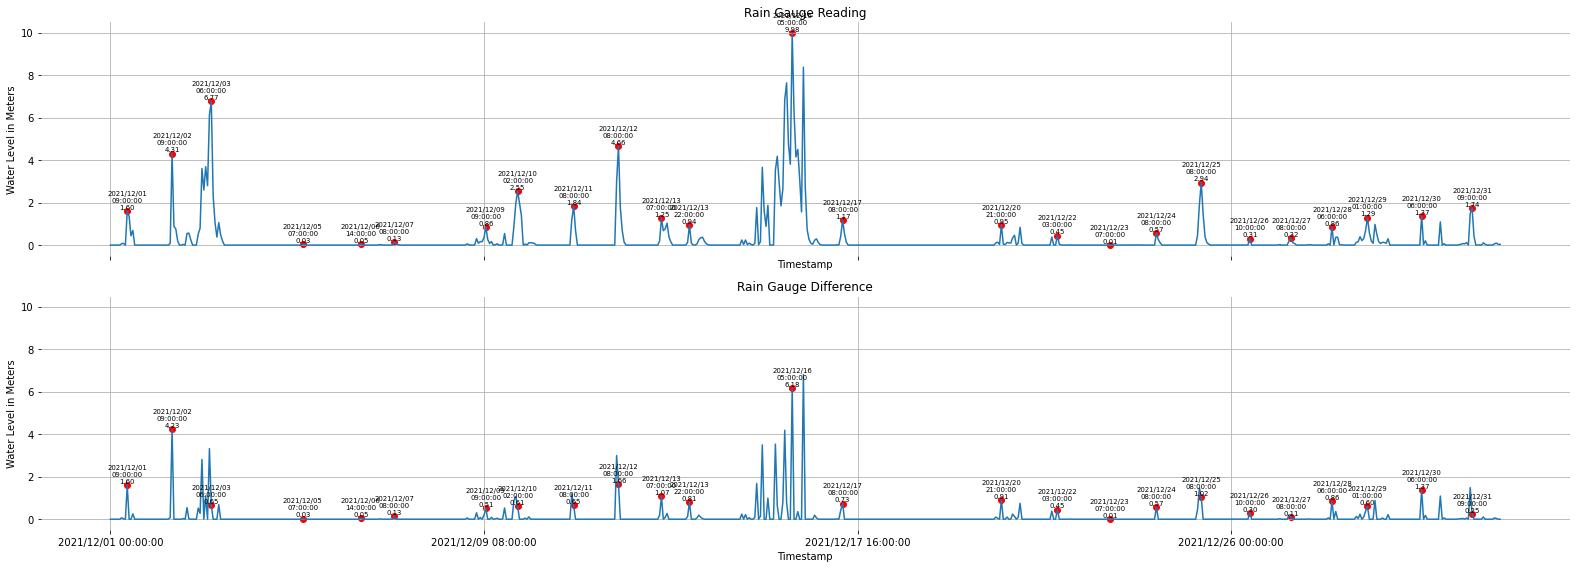

In [24]:
fig, ax = plt.subplots(2,1, figsize=(22,8), sharex=True, sharey=True)

ax[0].plot(main_df['Timestamp'], main_df['Rain Gauge'])
ax[0].set_title('Rain Gauge Reading')

raw_rg_arry = main_df['Rain Gauge'].to_numpy()
raw_rg_max_index = argrelextrema(raw_rg_arry, np.greater , order = 10)[0]
ax[0].scatter(main_df['Timestamp'][raw_rg_max_index], raw_rg_arry[raw_rg_max_index], color='r')

for index in raw_rg_max_index:
    timestamp = str(main_df['Timestamp'][index])
    ax[0].annotate("{}\n{}\n{:.2f}".format(timestamp.split()[0],timestamp.split()[1],raw_rg_arry[index]),
    (main_df['Timestamp'][index],raw_rg_arry[index] + 0.05),
    va='bottom',ha='center',fontsize='x-small')

ax[1].plot(main_df['Timestamp'], main_df['RG_Diff'])
ax[1].set_title('Rain Gauge Difference')

rg_diff_arry = main_df['RG_Diff'].to_numpy()
rg_diff_max_index = argrelextrema(raw_rg_arry, np.greater , order = 10)[0]
ax[1].scatter(main_df['Timestamp'][rg_diff_max_index], rg_diff_arry[rg_diff_max_index], color='r')

for index in rg_diff_max_index:
    timestamp = str(main_df['Timestamp'][index])
    ax[1].annotate("{}\n{}\n{:.2f}".format(timestamp.split()[0],timestamp.split()[1],rg_diff_arry[index]),
    (main_df['Timestamp'][index],rg_diff_arry[index] + 0.05),
    va='bottom',ha='center',fontsize='x-small')

label = np.arange(0,len(main_df['Timestamp']),1) % 200 == 0
for x in ax:
    x.set_xticks(main_df["Timestamp"].loc[label])
    x.set_xlabel("Timestamp")
    x.set_ylabel("Water Level in Meters")
    x.grid(visible=True)

    x.spines['top'].set_visible(False)
    x.spines['right'].set_visible(False)
    x.spines['bottom'].set_visible(False)
    x.spines['left'].set_visible(False)

fig.tight_layout()

rg_fig = fig
plt.show()


### Saving File

Save the Data Frame into an Excel Sheet with timestamps converted to string data to the directory Cleaned_Cagayan/(start date)_e(end date) Report.

Figures are also saved to the said directory.

In [19]:
time_frmt = '%Y/%m/%d %H:00:00'
main_df['Timestamp'] = main_df['Timestamp'].apply(lambda x: x.strftime(time_frmt))

In [20]:
main_df['Corrected Water Level'] = corrected_main_df['Water Level']

start_str = start_date.strftime("%Y%d%m")
end_str = end_date.strftime("%Y%d%m")

filename = f"{start_str}_{end_str} Report"
parent_directory = "Cleaned_Cagayan/"

directory = os.path.join(parent_directory,filename)
print("Creating directory {}".format(directory))
try:
    os.mkdir(directory)
except:
    print("Appending to Existing Directory")

with pd.ExcelWriter(os.path.join(directory,f"{filename}.xlsx")) as writer:
    main_df.to_excel(writer, sheet_name=f"{filename}")

water_fig.savefig(os.path.join(directory,f"Water Level {filename}.png"),transparent=False,dpi=600)
rg_fig.savefig(os.path.join(directory,f"Rain Gaugy {filename}.png"),transparent=False,dpi=600)

print("Excel Sheet and Figures are successfully saved")




Creating directory Cleaned_Cagayan/20210112_20220101 Report
Excel Sheet and Figures are successfully saved


In [21]:
# notebook_dir = os.path.join(directory,f"{filename}")
# dir = "".join([r"\.", directory])

# import subprocess

# !jupyter nbconvert --to html .\#Cagayan Processing.ipynb
# print(dir)